In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Download Data
df = pd.read_csv('https://query.data.world/s/dp4rga6fhvcpeq6p5xwfiedykht5vo').dropna()

In [350]:
def plot_density(long,lat, cmap='Reds', c='density'):

    # Calculate the point density
    xy = np.vstack([long, lat])
    z = gaussian_kde(xy)(xy)    
    if c=='density':
        plt.scatter(long, lat, c=z, s=10, cmap = cmap)
    else:
        scatter = plt.scatter(long, lat, c=c, s=10, cmap = cmap)


In [254]:
WORLD = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))



In [221]:
df.shape

(101008, 12)

In [222]:
%cd "~/Documents/UOC/Visualizacion_Datos/PRAC2"

/Users/pau-study/Documents/UOC/Visualizacion_Datos/PRAC2


In [289]:
df.date_time = pd.to_datetime(df.date_time)
df['year'] = df.date_time.apply(lambda date: date.year)
df['month'] = df.date_time.apply(lambda date: date.month_name())
df['day'] = df.date_time.apply(lambda date: date.day)
df['hour'] = df.date_time.apply(lambda date: date.hour)

In [224]:
df.sort_values('date_time').head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,month,day
25895,Possible contact with Visitor as a child,Greensburg,PA,1969-01-01 10:00:00,unknown,unknown,Occurred : 1/1/1969 10:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/028/S28756.html,Possible contact with Visitor as a child When ...,2003-05-13T00:00:00,40.335696,-79.550268,January,1
9383,"Five bright white, small balls jumped out of t...",Farmerville,LA,1969-01-01 20:00:00,other,2 minutes,Occurred : 1/1/1969 20:00 (Entered as : 01-01...,http://www.nuforc.org/webreports/008/S08193.html,"Five bright white, small balls jumped out of t...",1999-07-05T00:00:00,32.773800,-92.340900,January,1
8300,1 and 2 and 3 cloud type objects immediately a...,Naples,FL,1969-01-04 23:30:00,oval,???,Occurred : 1/4/1969 23:30 (Entered as : 1/4/6...,http://www.nuforc.org/webreports/005/S05265.html,1 and 2 and 3 cloud type objects immediately a...,1999-02-16T00:00:00,26.193182,-81.737030,January,4
85661,"Flat black color, 6-legged, toy jack shaped, b...",Pittsburgh,PA,1969-01-08 21:30:00,other,5 minutes,Occurred : 1/8/1969 21:30 (Entered as : 01/08...,http://www.nuforc.org/webreports/104/S104287.html,"Flat black color, 6-legged, toy jack shaped, b...",2013-11-11T00:00:00,40.443092,-79.974242,January,8
14450,Sphere's appear in the room within touching di...,Miami,FL,1969-01-15 23:00:00,sphere,15 Min. Plus,Occurred : 1/15/1969 23:00 (Entered as : 01/1...,http://www.nuforc.org/webreports/014/S14992.html,Sphere's appear in the room within touching di...,2000-12-02T00:00:00,25.774143,-80.289519,January,15


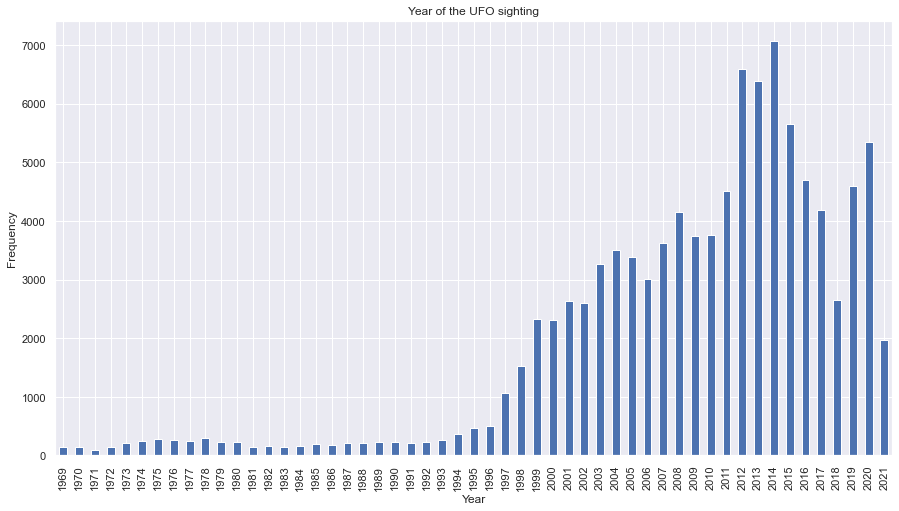

In [293]:
df['year'].value_counts().sort_index().plot.bar(title='Year of the UFO sighting', xlabel='Year', ylabel='Frequency')
plt.show()

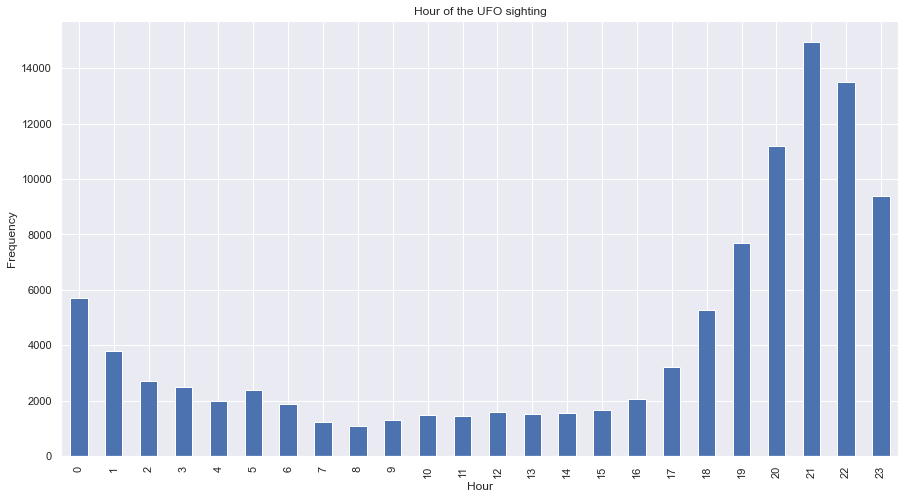

In [362]:
df['hour'].value_counts().sort_index().plot.bar(title='Hour of the UFO sighting', xlabel='Hour', ylabel='Frequency')
plt.show()

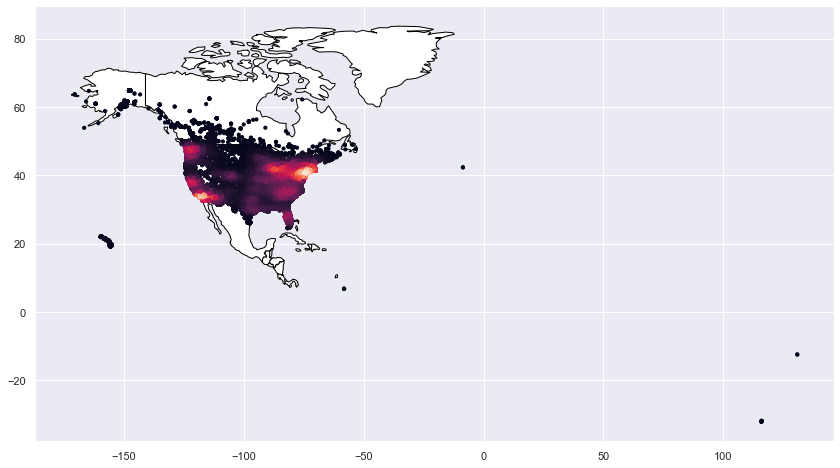

In [266]:
# We restrict to South America.
ax = WORLD[WORLD.continent == 'North America'].plot(
    color='white', edgecolor='black')


plot_density(df.city_longitude,
             df.city_latitude, cmap=None)

plt.show()

In [226]:
table = pd.pivot_table(df[df.date_time>= '2000-01-01'],values='date_time', index=['month'],
                    columns=['day'], aggfunc='count')

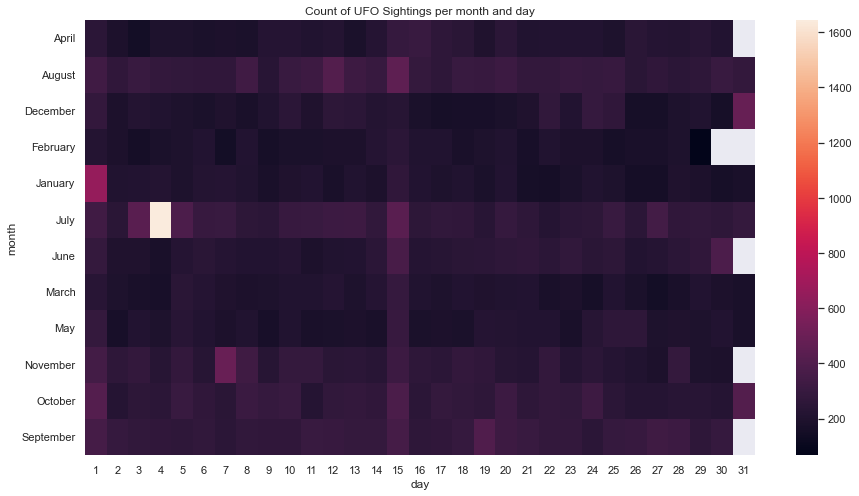

In [227]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(table).set(title='Count of UFO Sightings per month and day')
plt.show()

In [228]:
date_count.mean().round(2)

1.16

In [229]:
date_count.sort_values(ascending=False)[:10]

2015-11-07 18:00:00    93
2014-07-04 22:00:00    42
2012-07-04 22:00:00    30
2010-07-04 22:00:00    29
2014-07-04 21:00:00    26
1999-11-16 19:00:00    24
2011-07-04 22:00:00    24
2015-07-04 22:00:00    24
2004-10-31 20:00:00    22
2010-07-04 21:00:00    22
Name: date_time, dtype: int64

In [230]:
df_november_seventh_2015 = df[df.date_time == '2015-11-07 18:00:00']

In [231]:
states = geopandas.read_file('usa-states-census-2014.shp')


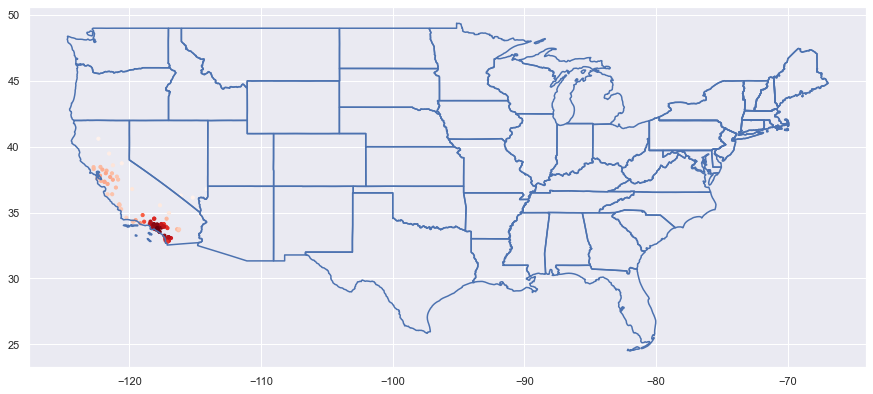

In [252]:
states.boundary.plot()

plot_density(df_november_seventh_2015.city_longitude,
             df_november_seventh_2015.city_latitude)


plt.show()

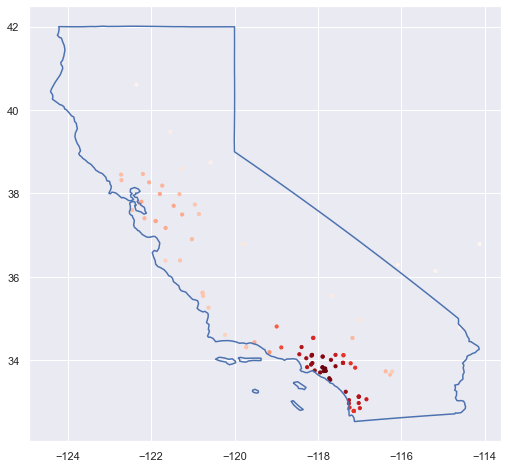

In [272]:
states[states.STUSPS=='CA'].boundary.plot()

plot_density(df_november_seventh_2015.city_longitude,
             df_november_seventh_2015.city_latitude, cmap='Reds')

plt.show()

<AxesSubplot:ylabel='shape'>

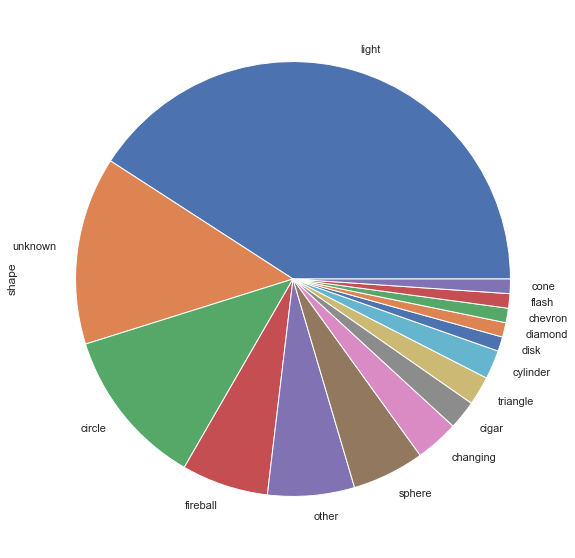

In [361]:
df_november_seventh_2015['shape'].value_counts().plot.pie(figsize=(15,10))

In [409]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS = list(STOPWORDS)
STOPWORDS.extend(['seen', 'sky', 'navy', 'missile', 'NUFORC', 'Note','launch', 'PD', 'U.','S.', 'U', 'US', 'moving', 'S', 'W', 'CA'])

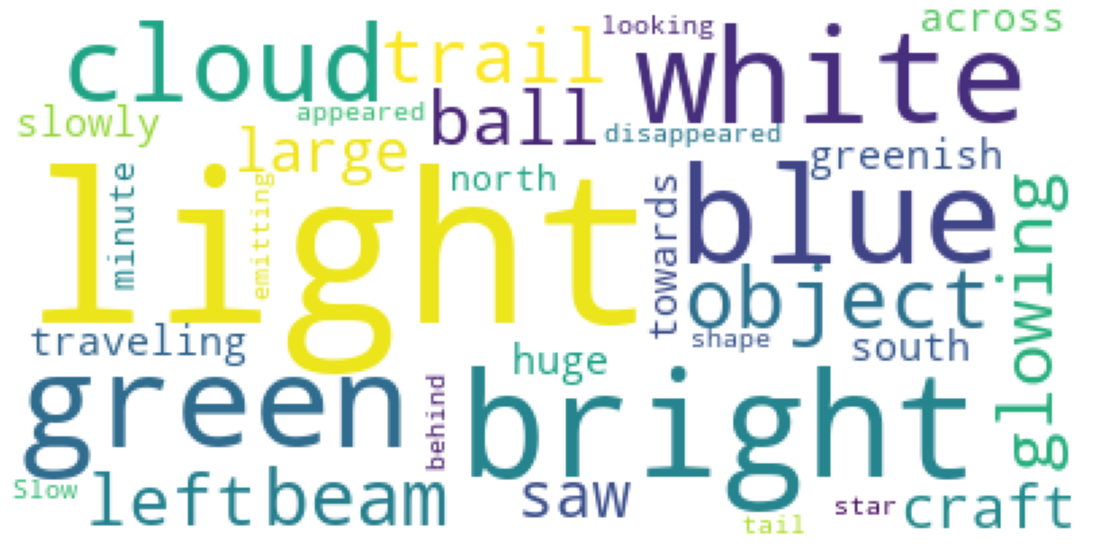

In [ ]:
wordcloud = WordCloud(#width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(df_november_seventh_2015.summary.str.cat())
 
# plot the WordCloud image                      
#plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()